In [354]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [355]:
data = pd.read_csv("./datasets/titanic/train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Exploration

Find the number of observations and features given

In [356]:
data.shape

(891, 11)

A few observatations:
 1. We're missing some enteries on Age, Cabin, and embarked.  We'll either need to fill the missing values or drop the feature
 2. Name, Sex, Ticket, Cabin and Embarked will need to be encoded

In [357]:
data.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Heininen, Miss. Wendla Maria",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


From history we know women, children and the wealthy were most likely to survive.  Let's see if the data confirms this.

Text(0.5,1,'male vs female survival')

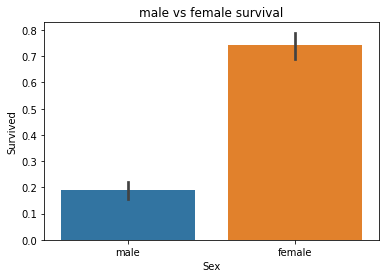

In [358]:
sns.barplot("Sex", "Survived", data=data).set_title("male vs female survival")

The data shows that almost everyone embarked from S so we will just fill the 2 missing values with S

In [359]:
data.groupby("Embarked").count()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,
C,168,168,168,168,130,168,168,168,168,69
Q,77,77,77,77,28,77,77,77,77,4
S,644,644,644,644,554,644,644,644,644,129


In [360]:
print(data["Embarked"].count())
data["Embarked"] = data["Embarked"].fillna('S')
print(data["Embarked"].count())

889
891


Text(0.5,1,'port of embarkation survival rate')

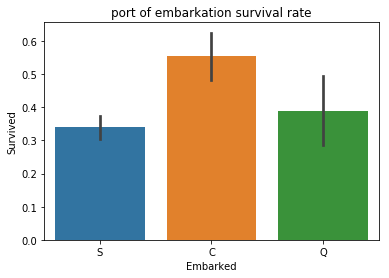

In [378]:
sns.barplot("Embarked", "Survived", data=data).set_title("port of embarkation survival rate")

Could this be because people at port C paid more for their tickets and people at port S paid the least?  Doesn't look like it.

In [366]:
fp = data.groupby("Embarked").Fare
pd.DataFrame(data={"avg": fp.mean(), "std": fp.std(), "min": fp.min(), "max": fp.max()})

,avg,max,min,std
Embarked,,,,
C,59.954144,512.3292,4.0125,83.912994
Q,13.276030,90.0000,6.7500,14.188047
S,27.243651,263.0000,0.0000,35.952905


Text(0.5,1,'class survival rate')

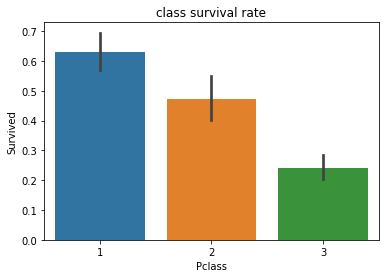

In [367]:
sns.barplot("Pclass", "Survived", data=data).set_title("class survival rate")

In [365]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)